Реализованы 2 функции:
* generate_equiprobable_sample - равновероятный сэмпл
* generate_wighted_sample - взвешенный сэмпл

В них передается:
- n - из него потом просто создается xrange
- m - размер выборки
- get_weight (только в generate_wighted_sample) - функция определения веса для элемента

In [10]:
import random
import heapq

def generate_equiprobable_sample(n, m):
    sample = []
    for i in xrange(1, n + 1):
        if len(sample) < m:
            sample.append(i)
        else:
            if (random.random() < (float(m) / (i + 1))):
                to_replace = random.randrange(m)
                sample[to_replace] = i
    return sample
        
def generate_wighted_sample(n, m, get_weight):
    sample = []
    for i in xrange(1, n + 1):
        chance = pow(random.random(), 1.0 / get_weight(i))
        #print i, chance
        if len(sample) < m:
            heapq.heappush(sample, (chance, i))
        else :
            if (chance > sample[0][0]):
                heapq.heappush(sample, (chance, i))
                heapq.heappop(sample)
                
    return [el[1] for el in sample]

На основе выше описанных функций были созданы генераторы сэмплов:

In [11]:
def sample_equiprobable_generator(n, m, repeats):
    for _ in xrange(repeats):
        yield generate_equiprobable_sample(n, m)
        
def sample_wiegthed_linear_generator(n, m, repeats):
    def get_weight(i):
        return i
    for _ in xrange(repeats):
        yield generate_wighted_sample(n, m, get_weight)
        

def sample_wiegthed_square_generator(n, m, repeats):
    def get_weight(i):
        return i * i
    for _ in xrange(repeats):
        yield generate_wighted_sample(n, m, get_weight)   
        

def sample_wiegthed_equiprobable_generator(n, m, repeats):
    def get_weight(i):
        return 1
    for _ in xrange(repeats):
        yield generate_wighted_sample(n, m, get_weight)   
        
def count_frequensy(n, sample_generator):
    frequency = []
    for sample in sample_generator:
        frequency.extend(sample)
    return frequency

In [33]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

def drawhistogram(title, result):
    fig = plt.figure(figsize=(16 ,5))
    
    plt.title(title)
    plt.hist(result, bins=100, alpha=0.75)
    plt.xlabel("Value")
    plt.ylabel("Frequency")

    plt.grid(True)
    
    plt.show()

### Гистограммы

Для проверки результатов использованы следующие значения:
* n = 1000 - размер для генерации потока
* m = 100 - размер сэмпла
* repeats = 1000 - количество сгенерированныъ сэмплов

сгенерированные графики:
1. Equipropable - равномерное распределение для элеметнов из потока.
2. Weighted linear - вес **wi = i**.
2. Weighted square - вес **wi = i\*i**
2. Weighted equipropable - вес **wi = 1**

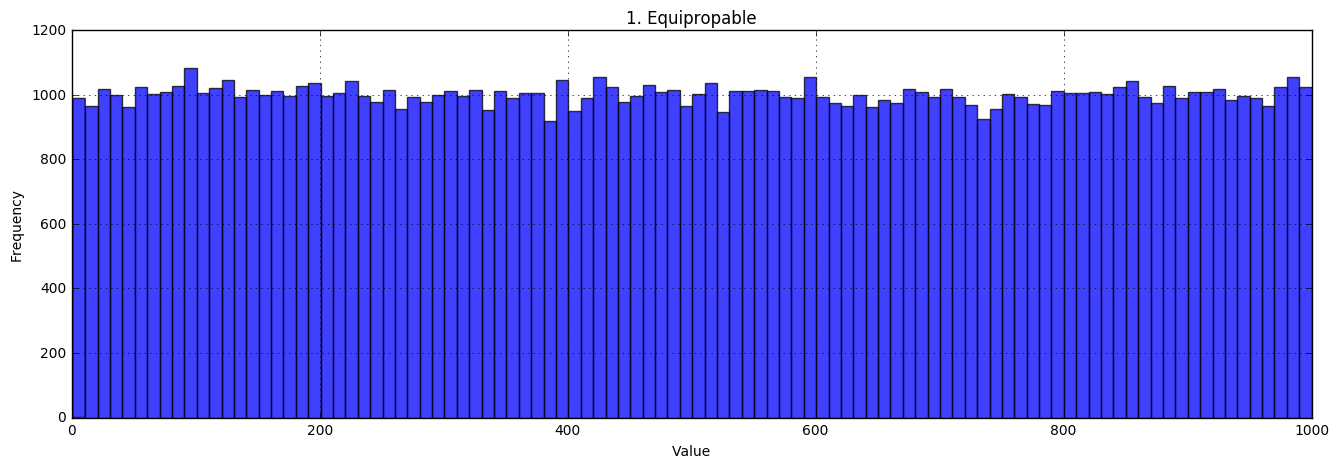

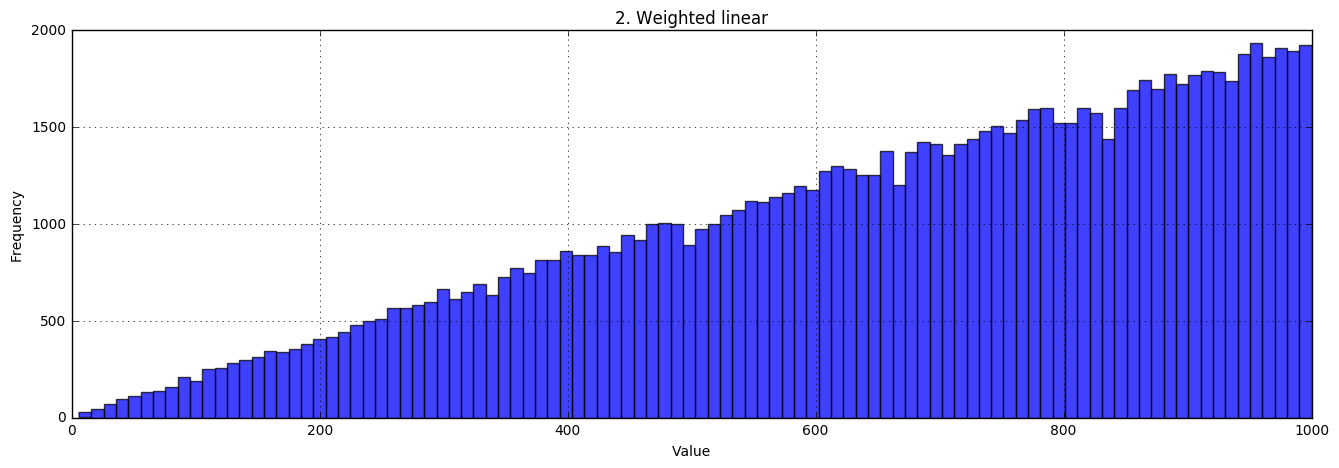

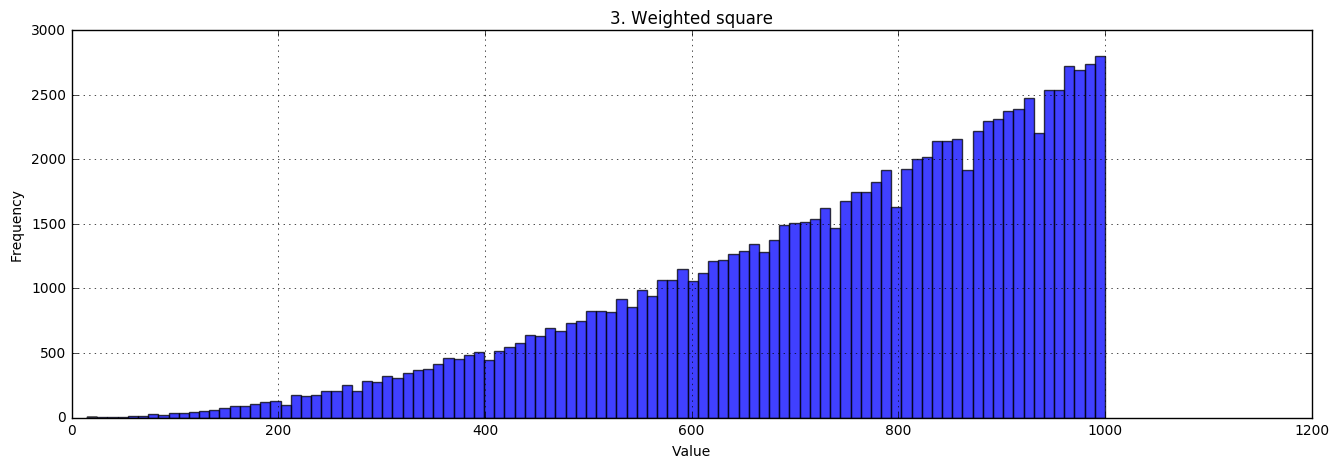

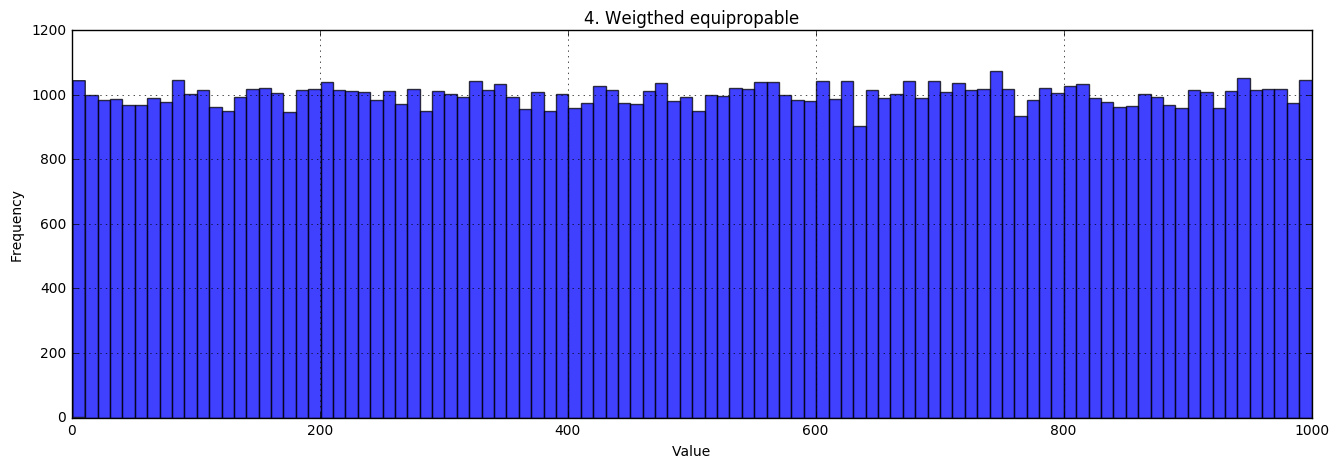

In [35]:
import time 

n = 1000
m = 100
repeats = 1000

start_time = time.time()
samples_equiprobable = count_frequensy(n, sample_equiprobable_generator(n, m, repeats))
samples_equiprobable_time = time.time() - start_time

samples_wiegthed_linear = count_frequensy(n, sample_wiegthed_linear_generator(n, m, repeats))
samples_wiegthed_square = count_frequensy(n, sample_wiegthed_square_generator(n, m, repeats))

start_time = time.time()
samples_wiegthed_equiprobable = count_frequensy(n, sample_wiegthed_equiprobable_generator(n, m, repeats))
samples_wiegthed_equiprobable_time =  time.time() - start_time

drawhistogram('1. Equipropable', samples_equiprobable)
drawhistogram('2. Weighted linear', samples_wiegthed_linear)
drawhistogram('3. Weighted square', samples_wiegthed_square)
drawhistogram('4. Weigthed equipropable', samples_wiegthed_equiprobable)

In [38]:
print 'Equipropable time: ', samples_equiprobable_time
print 'Weigthed equipropable time: ', samples_wiegthed_equiprobable_time

Equipropable time:  0.966331005096
Weigthed equipropable time:  1.39327406883


### Выводы

При установке весов для элементов потока - мы получаем соответствующую зависимость частоты появления элемента в сэмпле от номера элемента. Это отлично видно на полученных графиках.  
Можно отметить, что первый алгоритм работает так же хорошо, как и второй с весом wi = 1. Но первый работает значительно быстрее:
- Equipropable time:  0.966331005096
- Weigthed equipropable time:  1.39327406883